In [ ]:
pip install emukit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emukit: filename=emukit-0.4.10-py3-none-any.whl size=257055 sha256=fbbfe8ef8734e6d2504de0572b4bd3d1d7a70ca29ddb18fb5d2137143a19d7d0
  Stored in directory: /root/.cache/pip/wheels/30/d1/af/64ddede19b5eb77bd70362edebf9d393bf77dc34d354c11292
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102546 sha256=75fa6bbd5fd74197ad1bf367fcf84230eab2bf231f7e021d64f2e7d11c1443e5
  Stored in directory: /root/.cache/pip/wheels/d2/e

In [ ]:
import GPy
import emukit.multi_fidelity
import emukit.test_functions
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper
from emukit.multi_fidelity.models import GPyLinearMultiFidelityModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
%matplotlib inline

In [ ]:
pip install GPy

In [ ]:
# Generate sample data

x_train_l =  np.array([[70,100],[70,80],[70,50],[70,30],[70,0],[60,100],[60,80],[60,50],[60,30],[60,0],[50,100],[50,80],[50,50],[50,30],[50,0],[40,100],[40,80],[40,50],[40,30],[40,0]])
x_train_h = np.array([[70,100],[70,0],[60,80],[50,50],[40,100],[40,0]])



y_train_l =  np.array([4.5608,
4.284,
3.9654,
3.7805,
3.5478,
2.5223,
2.333,
2.1315,
2.0013,
1.8682,
1.4417,
1.3231,
1.1671,
1.0813,
0.99393,
0.82499,
0.75554,
0.63434,
0.57971,
0.49856]).reshape(-1,1)
y_train_h = np.array([4.7628,
3.5457,
2.4286,
1.2605,
0.88475,
0.6215 ]).reshape(-1,1)

In [ ]:
# x_train_l=np.c_[ x_train_l, np.zeros(len(x_train_l)) ]
# x_train_h=np.c_[ x_train_h, np.ones(len(x_train_h)) ]
# X_train=np.append(x_train_l,x_train_h,axis=0)
#
from emukit.multi_fidelity.convert_lists_to_array import convert_x_list_to_array, convert_xy_lists_to_arrays

# Y_train=np.append(y_train_l,y_train_h,axis=0)
X_train, Y_train = convert_xy_lists_to_arrays([x_train_l, x_train_h], [y_train_l, y_train_h])
print(X_train.shape)
print(Y_train.shape)

print(X_train)

(26, 3)
(26, 1)
[[ 70. 100.   0.]
 [ 70.  80.   0.]
 [ 70.  50.   0.]
 [ 70.  30.   0.]
 [ 70.   0.   0.]
 [ 60. 100.   0.]
 [ 60.  80.   0.]
 [ 60.  50.   0.]
 [ 60.  30.   0.]
 [ 60.   0.   0.]
 [ 50. 100.   0.]
 [ 50.  80.   0.]
 [ 50.  50.   0.]
 [ 50.  30.   0.]
 [ 50.   0.   0.]
 [ 40. 100.   0.]
 [ 40.  80.   0.]
 [ 40.  50.   0.]
 [ 40.  30.   0.]
 [ 40.   0.   0.]
 [ 70. 100.   1.]
 [ 70.   0.   1.]
 [ 60.  80.   1.]
 [ 50.  50.   1.]
 [ 40. 100.   1.]
 [ 40.   0.   1.]]


In [ ]:
## Create standard GP model using only high-fidelity data
x_train_DNS=np.array([[70,0],[70,100],[70,50],[60,0],[60,30],[60,80],[50,80],[50,50],[40,0],[40,30],[40,100]])
y_train_DNS=np.array([3.5457,
4.7628,
4.0937,
1.8453,
2.0809,
2.4286,
1.3877,
1.2605,
0.6215,
0.69657,
0.88475
]).reshape(-1,1)

kernelDNS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[5.0,5.0],variance=0.0001,ARD=True)
kernelDNS.lengthscale.constrain_bounded(0,1000)
kernelDNS.variance.constrain_bounded(0,10)
high_gp_model = GPy.models.GPRegression(x_train_DNS, y_train_DNS, kernelDNS)
high_gp_model.Gaussian_noise.fix(0.00001)

## Fit the GP model

high_gp_model.optimize_restarts(50)


Optimization restart 1/50, f = 6.918951472487769
Optimization restart 2/50, f = 24.259645836518402
Optimization restart 3/50, f = 6.918951472433208
Optimization restart 4/50, f = 24.050073438289612
Optimization restart 5/50, f = 6.918951472603294
Optimization restart 6/50, f = 6.9189514725209715
Optimization restart 7/50, f = 6.934629630148544
Optimization restart 8/50, f = 6.918951472580388
Optimization restart 9/50, f = 6.9189514725456025
Optimization restart 10/50, f = 6.9189514723254675
Optimization restart 11/50, f = 6.918951472416875
Optimization restart 12/50, f = 6.918951473881243
Optimization restart 13/50, f = 6.91895147398723
Optimization restart 14/50, f = 6.918951472458135
Optimization restart 15/50, f = 6.918951472441821
Optimization restart 16/50, f = 8.056795843510937
Optimization restart 17/50, f = 6.9311037050112105
Optimization restart 18/50, f = 6.918951472417504
Optimization restart 19/50, f = 6.91895147244835
Optimization restart 20/50, f = 6.91895147250619
Optimi

In [ ]:
print(high_gp_model.ExpQuad.lengthscale[0])
print(high_gp_model.ExpQuad.lengthscale[1])
print(high_gp_model.ExpQuad.variance)
print(high_gp_model.gradient)
# Get the gradients of optimization
gradients_dns = high_gp_model.gradient

# Get the names of the model's parameters
parameter_dns = high_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_dns)):
    print(f"Parameter: {parameter_dns[i]} - Gradient: {gradients_dns[i]}")

12.913583992278724
257.15365986750743
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                      8.65693229  |   0.0,10.0    |        
[ 4.98644034e-07 -2.37375400e-07 -1.45799224e-08  4.28673170e+03]
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 4.986440339384906e-07
Parameter: ExpQuad.lengthscale - Gradient: -2.373753996303773e-07
Parameter: Gaussian_noise.variance - Gradient: -1.4579922363642592e-08


In [ ]:
print(x_train_DNS)

[[ 70   0]
 [ 70 100]
 [ 70  50]
 [ 60   0]
 [ 60  30]
 [ 60  80]
 [ 50  80]
 [ 50  50]
 [ 40   0]
 [ 40  30]
 [ 40 100]]


In [ ]:
## Create standard GP model using only low-fidelity data
x_train_RANS=x_train_l
y_train_RANS=y_train_l
kernelRANS = GPy.kern.ExpQuad(input_dim=2,lengthscale=[5.0,5.0],variance=0.0001,ARD=True)
kernelRANS.lengthscale.constrain_bounded(0,1000)
kernelRANS.variance.constrain_bounded(0,10)
low_gp_model = GPy.models.GPRegression(x_train_RANS, y_train_RANS, kernelRANS)
low_gp_model.Gaussian_noise.fix(0.01)

## Fit the GP model

low_gp_model.optimize_restarts(50)

Optimization restart 1/50, f = -5.245703723665578
Optimization restart 2/50, f = -5.245702773108749
Optimization restart 3/50, f = 0.0911073585704445
Optimization restart 4/50, f = -5.245704533379592
Optimization restart 5/50, f = -5.245704536915422
Optimization restart 6/50, f = -5.24570452419842
Optimization restart 7/50, f = -5.245703505497612
Optimization restart 8/50, f = -5.2457045359786205
Optimization restart 9/50, f = -5.245704522906038
Optimization restart 10/50, f = -5.245702941660374
Optimization restart 11/50, f = -5.245703812530344
Optimization restart 12/50, f = -5.24569166101521
Optimization restart 13/50, f = -5.24570452939195
Optimization restart 14/50, f = -5.24569964157564
Optimization restart 15/50, f = -5.245701657916523
Optimization restart 16/50, f = -5.245704532551687
Optimization restart 17/50, f = -5.245704159163017
Optimization restart 18/50, f = -5.245704442179462
Optimization restart 19/50, f = -5.245704531163913
Optimization restart 20/50, f = 0.091107358

In [ ]:

kernels = [GPy.kern.ExpQuad(input_dim=2,lengthscale=5.0,variance=0.0001),GPy.kern.ExpQuad(input_dim=2,lengthscale=5.0,variance=0.0001)]

lin_mf_kernel = emukit.multi_fidelity.kernels.LinearMultiFidelityKernel(kernels)

gpy_lin_mf_model = GPyLinearMultiFidelityModel(X_train, Y_train, lin_mf_kernel, n_fidelities=2)

gpy_lin_mf_model.mixed_noise.Gaussian_noise.fix(0)

#gpy_lin_mf_model.mixed_noise.Gaussian_noise_1.fix(0)
lin_mf_model =model=GPyMultiOutputWrapper(gpy_lin_mf_model, 2, n_optimization_restarts=500)

## Fit the model

lin_mf_model.optimize()

 /usr/local/lib/python3.10/dist-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


Optimization restart 1/500, f = 4.893169081421457
Optimization restart 2/500, f = 38.75615508758172
Optimization restart 3/500, f = 38.75615538892631
Optimization restart 4/500, f = 38.75615455417788
Optimization restart 5/500, f = 38.756155394757926
Optimization restart 6/500, f = 38.75615538895985
Optimization restart 7/500, f = 38.756155404106174
Optimization restart 8/500, f = 38.756155389265594
Optimization restart 9/500, f = 38.75615538949426
Optimization restart 10/500, f = 38.755773288877336
Optimization restart 11/500, f = 38.75615538892666
Optimization restart 12/500, f = 38.756155388926885
Optimization restart 13/500, f = 38.756155390996064
Optimization restart 14/500, f = 38.75615538894113
Optimization restart 15/500, f = 38.75614514266116
Optimization restart 16/500, f = 38.75615539212725
Optimization restart 17/500, f = 38.75615538895169
Optimization restart 18/500, f = 38.75615538892309
Optimization restart 19/500, f = 38.756155388940925
Optimization restart 20/500, f = 

In [ ]:
print(low_gp_model.ExpQuad.lengthscale[0])
print(low_gp_model.ExpQuad.lengthscale[1])
print(low_gp_model.ExpQuad.variance)

# Get the gradients of optimization
gradients_rans = low_gp_model.gradient

# Get the names of the model's parameters
parameter_rans = low_gp_model.parameter_names()

# Print the gradients along with the parameter names
print("Gradients of Optimization:")
for i in range(len(parameter_rans)):
    print(f"Parameter: {parameter_rans[i]} - Gradient: {gradients_rans[i]}")

21.67417589750695
548.2939873930324
  index  |  GP_regression.ExpQuad.variance  |  constraints  |  priors
  [0]    |                      9.99999990  |   0.0,10.0    |        
Gradients of Optimization:
Parameter: ExpQuad.variance - Gradient: 0.06819639013029008
Parameter: ExpQuad.lengthscale - Gradient: 1.7854533651022506e-07
Parameter: Gaussian_noise.variance - Gradient: 1.570977250743827e-08


In [ ]:

#x_plot=np.reshape(x,[10000,2])
x_plot=np.array([[70,50],[60,30],[60,0],[50,80],[40,30]])
X_plot_l=np.c_[ x_plot, np.ones(len(x_plot)) ]
X_plot_h=np.c_[ x_plot, np.zeros(len(x_plot)) ]

In [ ]:
hf_mean_lin_mf_model, hf_var_lin_mf_model = lin_mf_model.predict(X_plot_h)

hf_std_lin_mf_model = np.sqrt(hf_var_lin_mf_model)
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(X_plot_h)
lf_mean_low_gp_model, lf_var_low_gp_model  = low_gp_model.predict(X_plot_h)

In [ ]:
# print(np.amax(hf_mean_lin_mf_model))
print(np.sqrt(hf_var_lin_mf_model)*1.96)
print(np.sqrt(hf_var_high_gp_model)*1.96)
print(np.sqrt(lf_var_low_gp_model)*1.96)
# c=(hf_mean_lin_mf_model.shape)
# print(c)



[[0.00019599]
 [0.00019595]
 [0.000196  ]
 [0.00019596]
 [0.00019599]]
[[0.0087594 ]
 [0.00874152]
 [0.00875758]
 [0.00876565]
 [0.00876162]]
[[0.21544442]
 [0.21790823]
 [0.23308177]
 [0.21972523]
 [0.22032673]]


In [ ]:



# np.savetxt('MF_70_e50_dns5_rans_8.dat', zip(write_mf), fmt=['%.3f','%.3f'])
# np.savetxt('LF_70_e50_dns5_rans_8.dat', zip(x_data,y_lf), fmt=['%.3f','%.3f'])
# np.savetxt('HF_70_e50_dns5_rans_8.dat', zip(x_data,y_hf), fmt=['%.3f','%.3f'])

In [ ]:
testx = np.linspace(40,70, 100, endpoint=True)

testy= np.linspace(0,100, 100, endpoint=True)
# testx=np.random.uniform(40, 70, size=100)
# testy=np.random.uniform(0, 100, size=100)

x = [(a, b) for a in testx for b in testy]
x=np.array([x])
x_plotrs=np.reshape(x,[10000,2])



x_plotrs_l=np.c_[ x_plotrs, np.ones(len(x_plotrs)) ]
x_plotrs_h=np.c_[x_plotrs, np.zeros(len(x_plotrs)) ]

In [ ]:
hf_mean_lin_mf_rs, hf_var_lin_mf_rs = lin_mf_model.predict(x_plotrs_h)



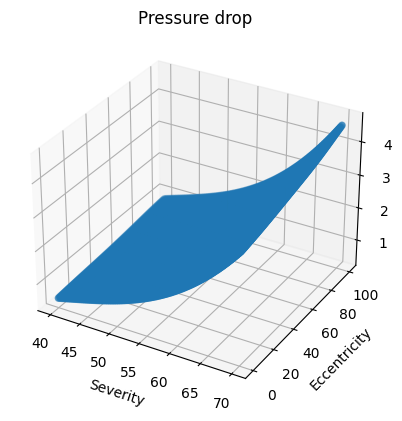

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
##ax.plot_surface(x_plotrs_h[:,0], x_plotrs_h[:,1], hf_mean_lin_mf_rs)
ax.scatter(x_plotrs_h[:,0], x_plotrs_h[:,1], hf_mean_lin_mf_rs)

# ax.scatter(x_train_l[:,0],x_train_l[:,0],y_train_l,c='r',marker='o',label='RANS')
# Add axis labels and title
ax.set_xlabel('Severity')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Pressure drop')
ax.set_title('Pressure drop')

# Show plot
plt.show()

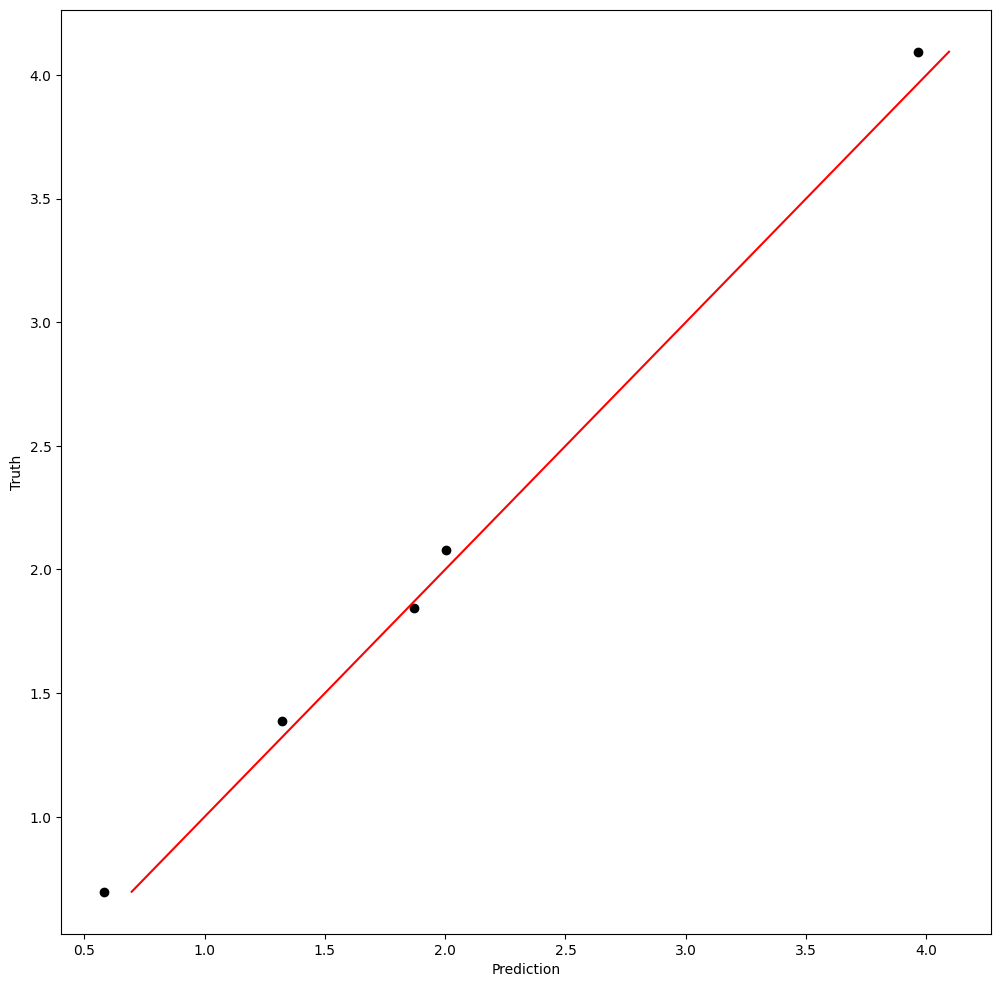

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(hf_mean_lin_mf_model, hf_mean_high_gp_model, c='black')
min_max = [hf_mean_high_gp_model.min(),hf_mean_high_gp_model.max()]
plt.plot(min_max, min_max, color='r')
plt.ylabel('Truth')
plt.xlabel('Prediction');
plt.show()

In [ ]:
import pylab as pl
la = pl.matplotlib.font_manager.FontManager()
lu = pl.matplotlib.font_manager.FontProperties(family = 'serif',size='12')
la.findfont(lu)
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

 /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: UserWarning:

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

 /usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1826: FutureWarning:

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



FileNotFoundError: ignored

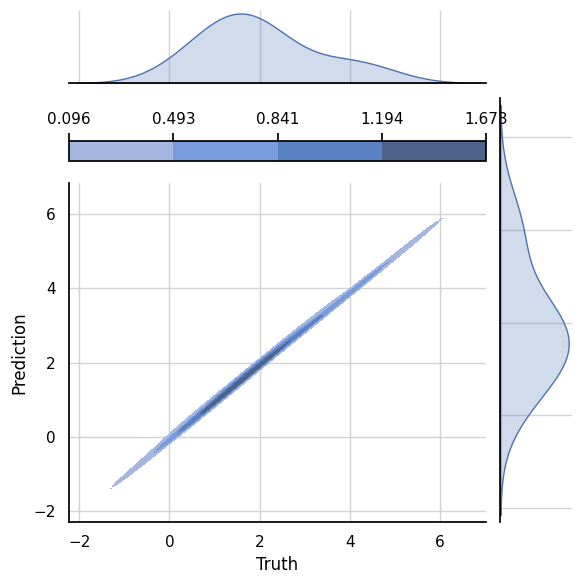

In [ ]:
import pandas as pd
import seaborn as sns

df=pd.DataFrame({'Truth': hf_mean_high_gp_model.flatten(),'Prediction':hf_mean_lin_mf_model.flatten()})
# sns.set(font={'family':'serif', 'size':12})
sns.set(font={'family':'serif', 'size':12}, rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.edgecolor':'black', 'axes.labelcolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'grid.color':'lightgray'})

rel=sns.jointplot(x="Truth",y="Prediction",  kind = "kde",data = df, fill=True, n_levels = 5, shade = True, cbar = True, shade_lowest = False, cbar_kws={"location":   "top"})
#rel.fig.suptitle("k=0.96")
plt.savefig('/content/drive/MyDrive/ColabNotebooks/newfig.png')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


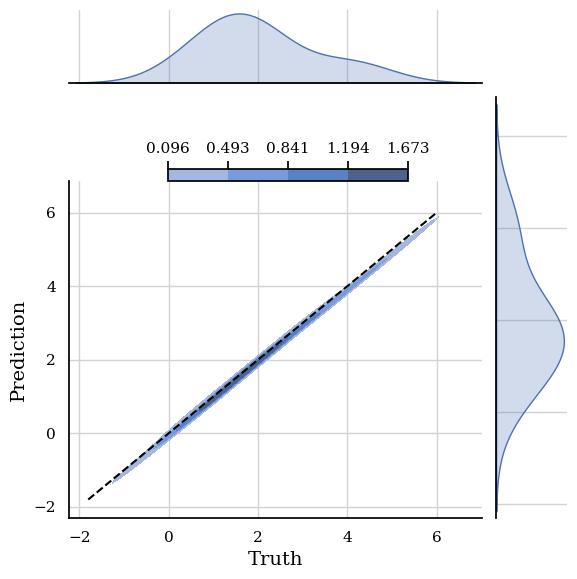

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({'Truth':hf_mean_high_gp_model.flatten(), 'Prediction': hf_mean_lin_mf_model.flatten()})

# Set seaborn and matplotlib font settings
sns.set(font_scale=1.0, style="whitegrid", rc={
    'font.family': 'serif',
    'font.size': 14,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'grid.color': 'lightgray'
})

# Create the jointplot with custom contour levels
rel = sns.jointplot(x="Truth", y="Prediction", kind="kde", data=df, fill=True, n_levels=5, thresh=0.05, cbar=True, cbar_kws={"location": "top"})
rel.set_axis_labels("Truth", "Prediction", fontsize=14)

# Calculate the minimum and maximum values for the 45-degree line
min_val = min(-1.8, -1.8)
max_val = max(6,6)
x = [min_val, max_val]
y = [min_val, max_val]

# Plot the 45-degree line
rel.ax_joint.plot(x, y, linestyle='dashed', color='black')

# Adjust the size and position of the colorbar
cbar_ax = rel.fig.axes[-1]
cbar_ax.set_position([.25, .68, .5, .02])  # [left, bottom, width, height]



from google.colab import drive
drive.mount('/content/drive')

plt.savefig('/content/drive/MyDrive/maxpressdiff_figure.pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
y_data=hf_mean_lin_mf_model.reshape(-1,1)
y_hf=hf_mean_high_gp_model.reshape(-1,1)


ci96=np.sqrt(hf_var_lin_mf_model)*1.96
ci=ci96.reshape(-1,1)
write_mf = np.stack((y_data,y_hf), axis = 1).reshape(-1,2)
write_hf = np.stack((y_hf,y_hf), axis = 1).reshape(-1,2)
print(write_hf.shape)
print(write_mf.shape)

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
np.savetxt('/content/drive/MyDrive/ColabNotebooks/MFpress.dat', write_mf, delimiter=' ,' )

np.savetxt('/content/drive/MyDrive/ColabNotebooks/HFpress.dat', write_hf, delimiter=' ,' )


In [ ]:

fig,ax=plt.subplots()
for i in range(RANS_full.shape[1]):
   ax.plot(RANS_full[:,i])
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [ ]:
conf= np.stack((y_data,y_hf,ci96), axis = 1).reshape(-1,3)


In [ ]:
  print(conf)


In [ ]:
plt.figure(figsize=(12,8))
plt.ylabel('HF(x)')
plt.xlabel('LF(x)')

plt.plot(y_train_l[[0,2,4,7,8,10],:], y_train_h, color='purple',marker='*',)
plt.title('Mapping from low fidelity to high fidelity')
plt.legend(['HF-LF Correlation'], loc='lower center');

In [ ]:
hf_mean_high_gp_model, hf_var_high_gp_model  = high_gp_model.predict(x_plotrs_h)
lf_mean_low_gp_model, lf_var_low_gp_model  = low_gp_model.predict(x_plotrs_h)

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with transparent colors
ax.scatter(x_plotrs_h[:, 0], x_plotrs_h[:, 1], hf_mean_lin_mf_rs, c='blue', alpha=0.2,label='Multifidelity')
ax.scatter(x_plotrs_h[:, 0], x_plotrs_h[:, 1], hf_mean_high_gp_model, c='red', alpha=0.2, label='DNS')
ax.scatter(x_plotrs_h[:, 0], x_plotrs_h[:, 1],lf_mean_low_gp_model, c='black', alpha=0.2, label='RANS')
# Uncomment the following line if you want to plot surface
# ax.plot_surface(x_plotrs_h[:, 0], x_plotrs_h[:, 1], hf_mean_lin_mf_rs)

# Uncomment the following lines if you want to plot additional scatter points
# ax.scatter(x_train_l[:, 0], x_train_l[:, 0], y_train_l, c='red', marker='o', label='RANS')

# Add axis labels and title
ax.set_xlabel('Severity')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Pressure drop')
ax.set_title('Pressure drop')

# Show plot
plt.show()

